# HW 2
# Koidala Surya Prakash
# EE18BTECH11026

In [1]:
# imports here!
import cv2 ## only to read rgb images 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import math

# Problem 1

In [54]:
class image :
    ####################### Utitlity functions ####################
    def disp_img(self, I, title = None): # A utility func for displaying images 
        plt.imshow(I, cmap = 'gray')
        plt.axis('off')
        plt.title(title)
        plt.show()
    
   
    def __init__ (self, path, display = False):
        self.path = path
        self.I = mpimg.imread(self.path) ## Reading the contents of the image I 
        if(display): ## Displaying I
            self.disp_img(self.I)
            
    def compute_hist(self, plot_hist = False):
        self.hist = np.zeros(256)
        for i in range(self.I.shape[0]):
            for j in range(self.I.shape[1]):
                self.hist[self.I[i][j]] = self.hist[self.I[i][j]] + 1
        self.hist = self.hist/self.I.size
        if(plot_hist):
            plt.stem(np.arange(0,256),self.hist , use_line_collection = True)
            plt.title('Hist for image')
            plt.xlabel('Pixel intensity')
            plt.ylabel('Normalized Frequency')
            plt.show()
            
    def binarize(self, thresh, display = False, title = None):
        self.I_bin = self.I.copy()
        self.I_bin[self.I >= thresh] = 1
        self.I_bin[self.I < thresh] = 0
        
        if(display):
            self.disp_img(self.I_bin, title)
            
    def invert_img(self, img, display = False, title = None):
        I_invert = img.copy()
        I_invert[np.where(img == 0)] = 1
        I_invert[np.where(img == 1)] = 0
        if(display):
            self.disp_img(I_invert, title)
        return I_invert
    
            
    def OTSU_binarisation(self,display = True):
        
        self.var_inter_cls = np.zeros(256) # arr containing the calculated weighted var of all thresholds
        self.P0_t = self.hist[0]
        self.mu0 = 0
        self.mu1 = 0
        
        self.mu = np.mean(self.I.flatten())
        
        for self.t in range(0,255):
            self.P0_t1 = self.P0_t + self.hist[self.t + 1]
            if(self.P0_t1 != 0 and self.P0_t1 != 1): # to ignore nan
                self.mu0 =  ( (self.mu0*self.P0_t) + ( (self.t+1)*self.hist[self.t+1] ) )/self.P0_t1
                self.mu1 = ( self.mu - (self.mu0*self.P0_t1) )/(1 - self.P0_t1)
            self.P0_t = self.P0_t1
            self.var_inter_cls[self.t + 1 ] = (self.P0_t)*(1-self.P0_t)*( (self.mu0 - self.mu1)**2 )

        self.otsu_t_opt2 = np.where(self.var_inter_cls== np.amax(self.var_inter_cls))
        print("The calculated optimal OTSU threshold is %d" %self.otsu_t_opt2)
        self.binarize( thresh = self.otsu_t_opt2, display= display , title = None)
        
    #########################################   FILTERS #################################
    def cross_5(self,i,j): ### Cross filter
        temp =  [(i-1,j),(i-2,j),(i,j),(i+1,j),(i+2,j),(i,j-2),(i,j-1),(i,j+1),(i,j+2)]
        self.filter = []
        for t in temp:
            if(self.valid(t[0],t[1])):
                self.filter.append(self.I_bin[t[0]][t[1]])
                
                
                
    def square_3(self,i,j): ## Square filter
        temp =  [(i-1,j-1),(i-1,j),(i-1,j+1),(i,j-1),(i,j),(i,j+1),(i+1,j-1),(i+1,j),(i+1,j+1)]
        self.filter = []
        for t in temp:
            if(self.valid(t[0],t[1])):
                self.filter.append(self.I_bin[t[0]][t[1]])
                
    def valid(self,i,j):
        if(i>-1 and j > -1 and i < self.I_bin.shape[0]and j < self.I_bin.shape[1]):
            return True
        else:
            return False
    ##############################    Code 1.1 ####################################    
    def erosion(self, filter_type,display = False, title= None):
        self.erode = np.zeros(self.I_bin.shape)
        
        for i in range(self.I_bin.shape[0]):
            for j in range(self.I_bin.shape[1]):
        
                if(filter_type ==  'square_3'):
                    self.square_3(i,j)
                    self.erode[i][j] = (np.all( self.filter ))*255
                elif(filter_type ==  'cross_5'):
                    self.cross_5(i,j)
                    self.erode[i][j] = (np.all( self.filter ))*255
        if(display):
            self.disp_img( self.erode, title )
            
    def dilation(self,filter_type,display = False, title = None):
        self.dilate = np.zeros(self.I_bin.shape)
        
        for i in range(self.I_bin.shape[0]):
            for j in range(self.I_bin.shape[1]):
        
                if(filter_type ==  'square_3'):
                    self.square_3(i,j)
                    self.dilate[i][j] = (np.any( self.filter ))*255
                elif(filter_type ==  'cross_5'):
                    self.cross_5(i,j)
                    self.dilate[i][j] = (np.any( self.filter ))*255
        if(display):
            self.disp_img( self.dilate, title)
            
    def median_operation(self, filter_type,display = False,  title = None):
        self.median =np.zeros(self.I_bin.shape)
        for i in range(self.I_bin.shape[0]):
            for j in range(self.I_bin.shape[1]):
        
                if(filter_type ==  'square_3'):
                    self.square_3(i,j)
                    self.median[i][j] = np.floor(np.median(self.filter))*255
                elif(filter_type ==  'cross_5'):
                    self.cross_5(i,j)
                    self.median[i][j] = np.floor(np.median(self.filter))*255
        if(display):
            self.disp_img( self.median, title )
    ##############################    Code 1.3 ####################################      
    def open_operation(self,filter_type,display = False, title = None):
        self.open = np.zeros(self.I_bin.shape)
        self.erosion(filter_type)
        temp = self.I_bin
        self.I_bin  = self.erode
        self.dilation(filter_type)
        self.open = self.dilate
        self.I_bin = temp
        
        if(display):
            self.disp_img( self.open, title )
        
        
    def clos_operation(self, filter_type, display = False, title = None):
        self.clos = np.zeros(self.I_bin.shape)
        self.dilation(filter_type)
        temp = self.I_bin
        self.I_bin = self.dilate
        self.erosion(filter_type)
        self.clos = self.erode
        self.I_bin = temp
        if(display):
            self.disp_img( self.clos, title )
            
    ##############################    Code 1.5 #################################### 
    def connected_components(self):
        self.R_pad = np.zeros((self.I_bin.shape[0] + 1, self.I_bin.shape[1] + 1))
        self.I_pad = np.zeros((self.I_bin.shape[0] + 1, self.I_bin.shape[1] + 1))
        self.I_pad[1:,1:] = self.I_bin
        
        self.I_pad = self.I_pad
        self.k = 1
        for i in range(1, self.I_bin.shape[0] + 1):
            for j in range(1, self.I_bin.shape[1] + 1):
                if(self.I_pad[i][j] == 1):
                    if(self.I_pad[i][j-1]==0 and self.I_pad[i-1][j] == 0):
                        self.R_pad[i][j] = self.k
                        self.k = self.k+1
                    elif(self.I_pad[i][j-1]==0 and self.I_pad[i-1][j] == 1):
                        self.R_pad[i][j] = self.R_pad[i-1][j]
                    elif(self.I_pad[i][j-1]==1 and self.I_pad[i-1][j] == 0):
                        self.R_pad[i][j] = self.R_pad[i][j-1]
                        
                    elif(self.I_pad[i][j-1]==1 and self.I_pad[i-1][j] == 1):
                        self.R_pad[i][j] = min(self.R_pad[i-1][j],self.R_pad[i][j-1] )
                        ## The below links all the components whenever there is a conflict
                        if(self.R_pad[i-1][j]!=self.R_pad[i][j-1]):
                            (x,y) = np.where(self.R_pad == max(self.R_pad[i-1][j],self.R_pad[i][j-1]))
                            for _t in range(len(x)):
                                self.R_pad[x[_t]][y[_t]] = min(self.R_pad[i-1][j],self.R_pad[i][j-1])
        self.R = self.R_pad[1:,1:]
        self.blobs_idx = set(self.R.flatten())
        self.count_blobs = len(self.blobs_idx) -1 
                    
        
    def find_pix_count_for_major_blob(self):
        k_vals,k_counts = np.unique(self.R.flatten(), return_counts=True)
        index = np.argmax(k_counts)

        if(k_vals[index]==0):
            k_counts[index] = -1
            index = np.argmax(k_counts)
        self.disp_img(self.I_bin, title = "Image on which we run connected components")
        print("The pixel count for the object of interest is %d", k_counts[index])

### Problem 1.1

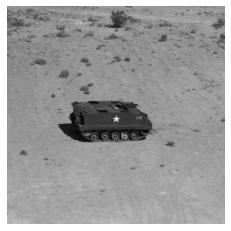

The calculated optimal OTSU threshold is 99


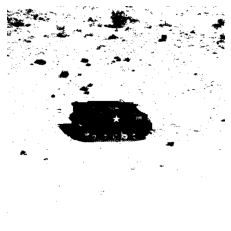

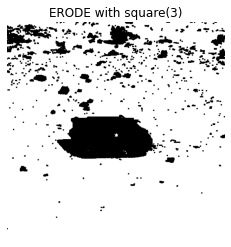

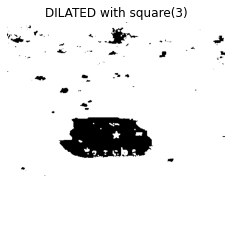

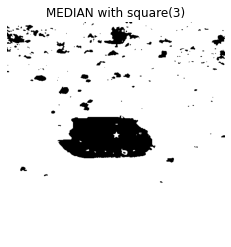

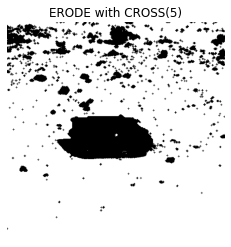

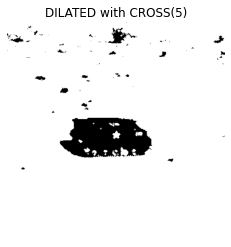

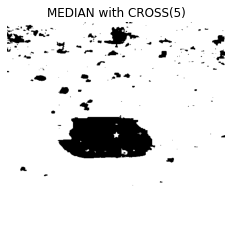

In [52]:
path1_a = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/APC.tiff'
img1_a = image(path1_a,display = True)


img1_a.compute_hist()
img1_a.OTSU_binarisation()





img1_a.erosion(filter_type = 'square_3', display = True, title = "ERODE with square(3)")
img1_a.dilation(filter_type = 'square_3', display = True, title =  "DILATED with square(3)")
img1_a.median_operation(filter_type = 'square_3', display = True, title = "MEDIAN with square(3)")



img1_a.erosion(filter_type = 'cross_5', display = True, title = "ERODE with CROSS(5)")
img1_a.dilation(filter_type = 'cross_5', display = True,  title =  "DILATED with CROSS(5)")
img1_a.median_operation(filter_type = 'cross_5', display = True, title = "MEDIAN with CROSS(5)")





### Problem 1.2
#### a) ERODE = NOT(DILATE(NOT))

The calculated optimal OTSU threshold is 99


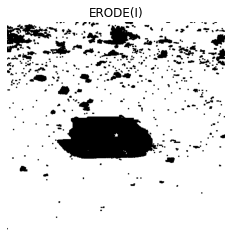

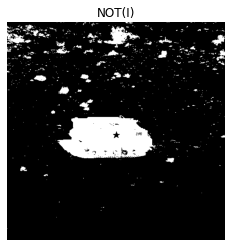

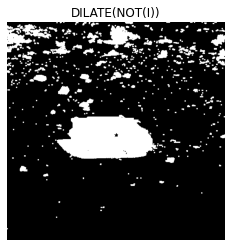

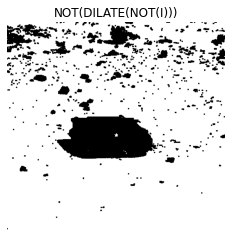

eroded_img  & not_dilated_not are equal!!


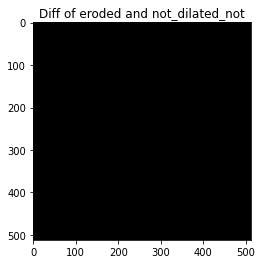

In [42]:
path1_a = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/APC.tiff'
img1_a = image(path1_a,display = False)

img1_a.compute_hist()
img1_a.OTSU_binarisation(False)


img1_a.erosion(filter_type = 'square_3', display = True, title = "ERODE(I)")
eroded_image = img1_a.erode

inverted_img = img1_a.invert_img(img1_a.I_bin, display = True, title = "NOT(I)")
img1_a.I_bin = inverted_img
img1_a.dilation(filter_type = 'square_3', display = True, title = "DILATE(NOT(I))")
dilated_not = img1_a.dilate/255

not_dilated_not =  img1_a.invert_img(dilated_not,display=True, title = "NOT(DILATE(NOT(I)))")*255


#### Checking if both images are equal
if(eroded_image.all() == not_dilated_not.all()):
    print("eroded_img  & not_dilated_not are equal!!")
    plt.imshow( eroded_image - not_dilated_not,cmap = 'gray')
    plt.title("Diff of eroded and not_dilated_not")
    plt.show()

#### b) DILATED = NOT(ERODE(NOT))

The calculated optimal OTSU threshold is 99


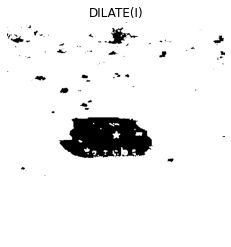

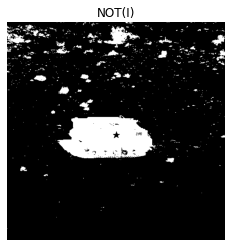

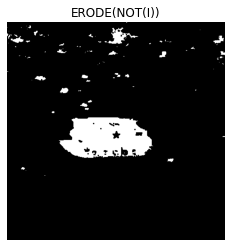

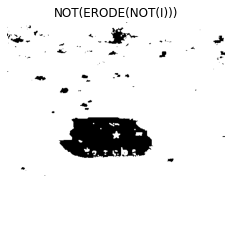

dilated_img  & not_erode_not are equal!!


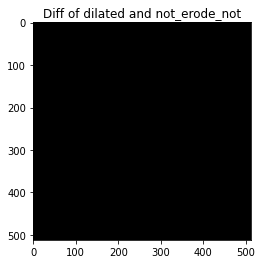

In [43]:
path1_a = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/APC.tiff'
img1_a = image(path1_a,display = False)


img1_a.compute_hist()
img1_a.OTSU_binarisation(display = False)

img1_a.dilation(filter_type = 'square_3', display = True, title = "DILATE(I)")
dilated_image = img1_a.dilate

inverted_img = img1_a.invert_img(img1_a.I_bin, display = True, title = "NOT(I)")
img1_a.I_bin = inverted_img
img1_a.erosion(filter_type = 'square_3', display = True, title = "ERODE(NOT(I))")
erode_not = img1_a.erode/255

not_erode_not =  img1_a.invert_img(erode_not,display=True, title = "NOT(ERODE(NOT(I)))")*255


#### Checking if both images are equal
if(dilated_image.all() == not_erode_not.all()):
    print("dilated_img  & not_erode_not are equal!!")
    plt.imshow( dilated_image - not_erode_not,cmap = 'gray')
    plt.title("Diff of dilated and not_erode_not")
    plt.show()

#### c) MEDIAN = NOT(MEDIAN(NOT))

The calculated optimal OTSU threshold is 99


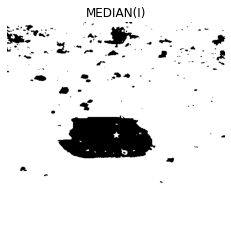

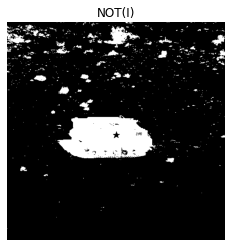

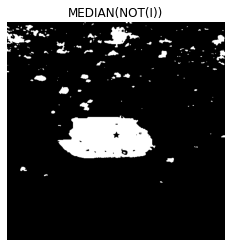

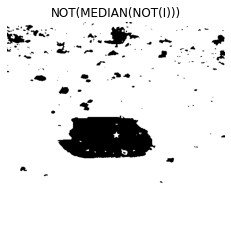

median_img  & not_median_not are equal!!


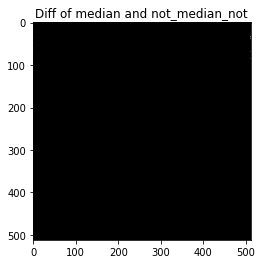

In [44]:
path1_a = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/APC.tiff'
img1_a = image(path1_a,display = False)
img1_a.compute_hist()
img1_a.OTSU_binarisation(display = False)

img1_a.median_operation(filter_type = 'square_3', display = True, title = "MEDIAN(I)")
median_image = img1_a.median

inverted_img = img1_a.invert_img(img1_a.I_bin, display = True, title = "NOT(I)")
img1_a.I_bin = inverted_img
img1_a.median_operation(filter_type = 'square_3', display = True, title = "MEDIAN(NOT(I))")
median_not = img1_a.median/255

not_median_not =  img1_a.invert_img(median_not,display=True, title = "NOT(MEDIAN(NOT(I)))")*255

#### Checking if both images are equal
if(median_image.all() == not_median_not.all()):
    print("median_img  & not_median_not are equal!!")
    plt.imshow( not_median_not - median_image,cmap = 'gray')
    plt.title("Diff of median and not_median_not")
    plt.show()

### Problem 1.3 



#### a) OPEN operation (uncomment to use cross_5)

The calculated optimal OTSU threshold is 99


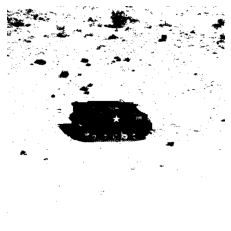

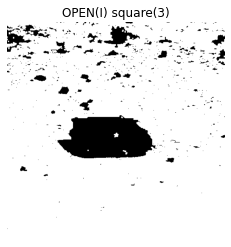

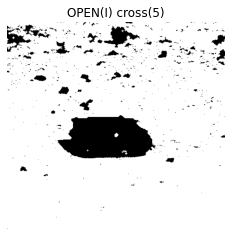

In [45]:
path1_a = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/APC.tiff'
img1_a = image(path1_a,display = False)
img1_a.compute_hist()
img1_a.OTSU_binarisation(display = True)

img1_a.open_operation(filter_type = 'square_3',display = True,  title = "OPEN(I) square(3)")
img1_a.open_operation(filter_type = 'cross_5',display = True,  title = "OPEN(I) cross(5)")

#### b) CLOS operation

The calculated optimal OTSU threshold is 99


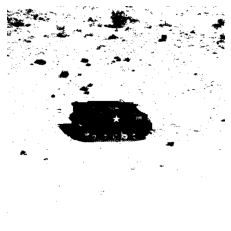

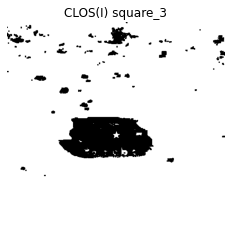

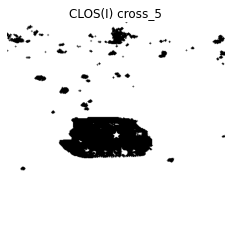

In [46]:
path1_a = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/APC.tiff'
img1_a = image(path1_a,display = False)
img1_a.compute_hist()
img1_a.OTSU_binarisation(display = True)

img1_a.clos_operation(filter_type = 'square_3',display = True,  title = "CLOS(I) square_3")
img1_a.clos_operation(filter_type = 'cross_5',display = True,  title = "CLOS(I) cross_5")

### Problem 1.4

#### a) CLOS-OPEN

The calculated optimal OTSU threshold is 99


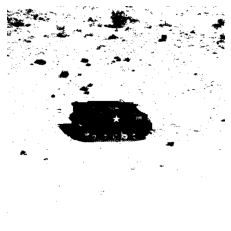

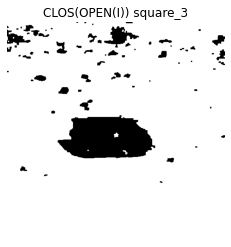

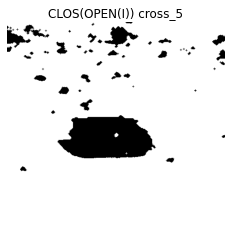

In [47]:
path1_a = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/APC.tiff'
img1_a = image(path1_a,display = False)
img1_a.compute_hist()
img1_a.OTSU_binarisation(display = True)


## Filter square(3)
img1_a.open_operation(filter_type = 'square_3',display = False,  title = "OPEN(I)")
img1_a.I_bin = img1_a.open
img1_a.clos_operation(filter_type = 'square_3',display = True,  title = "CLOS(OPEN(I)) square_3")



## Filter cross(5)
img1_a.open_operation(filter_type = 'cross_5',display = False,  title = "OPEN(I)")
img1_a.I_bin = img1_a.open
img1_a.clos_operation(filter_type = 'cross_5',display = True,  title = "CLOS(OPEN(I)) cross_5")

#### b)OPEN-CLOS

The calculated optimal OTSU threshold is 99


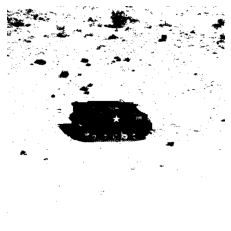

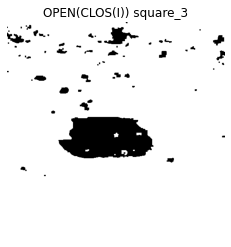

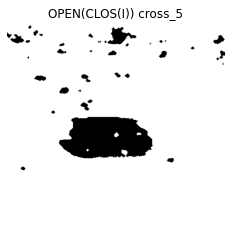

In [48]:
path1_a = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/APC.tiff'
img1_a = image(path1_a,display = False)
img1_a.compute_hist()
img1_a.OTSU_binarisation(display = True)

img1_a.clos_operation(filter_type = 'square_3',display = False,  title = "CLOS(I) square_3")
img1_a.I_bin = img1_a.clos
img1_a.open_operation(filter_type = 'square_3',display = True,  title = "OPEN(CLOS(I)) square_3")


img1_a.clos_operation(filter_type = 'cross_5',display = False,  title = "CLOS(I) cross_5")
img1_a.I_bin = img1_a.clos
img1_a.open_operation(filter_type = 'cross_5',display = True,  title = "OPEN(CLOS(I)) cross_5")

### Problem 1.5

The calculated optimal OTSU threshold is 99


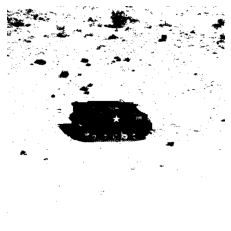

No. of blobs in white found : (which contains rocks and the tank) 858
The tank is the major blob of these white blobs
Counting pixels after binarisation ....


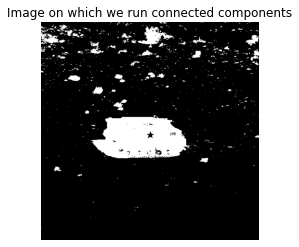

The pixel count for the object of interest is %d 16615


In [49]:
path1_a = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/APC.tiff'
img1_a = image(path1_a,display = False)
img1_a.compute_hist()
img1_a.OTSU_binarisation(display = True)


##############  IMP : inverting the image .. since the connected components works for white pixels ..
#### The tank is the major blob in the inverted image ..
img1_a.I_bin = img1_a.invert_img(img1_a.I_bin)


img1_a.connected_components()

print("No. of blobs in white found : (which contains rocks and the tank) %d"%img1_a.count_blobs)
print ("The tank is the major blob of these white blobs")

print("Counting pixels after binarisation ....")
img1_a.find_pix_count_for_major_blob()

# Problem2


In [55]:
class image2 :
    ##############################  Utility functions  #################################### 
    def disp_img(self, I, title = None): # A utility func for displaying images 
        plt.imshow(I, cmap = 'gray')
        plt.axis('off')
        plt.title(title)
        plt.show()
    

    def __init__ (self, path, display = False):
        self.path = path
        self.I  = cv2.imread(self.path,cv2.IMREAD_GRAYSCALE) ## Reading the contents of the image I 
        if(display): ## Displaying I
            self.disp_img(self.I)
            
    def compute_hist(self, I,  plot_hist = False, title = None):
        self.hist = np.zeros(256)
        for i in range(I.shape[0]):
            for j in range(I.shape[1]):
                self.hist[I[i][j]] = self.hist[I[i][j]] + 1
        self.hist = self.hist/I.size
        if(plot_hist):
            plt.stem(np.arange(0,256),self.hist , use_line_collection = True)
            plt.title('Hist for image')
            plt.xlabel('Pixel intensity')
            plt.ylabel('Normalized Frequency')
            plt.title(title)
            plt.show()
            
    ############################## Code 2.1  #################################### 
    def linear_transform(self, P, L , display = False, title = None):
        self.J = np.array([[  min(255, max(0,int(P*self.I[i][j] + L )))   for j in range(self.I.shape[1])] for i in range(self.I.shape[0])])
        if(display): ## Displaying J
            self.disp_img(self.J, title)
    ############################## Code 2.2  ####################################             
    def FSCS(self, display = False, title = None):
        maxi, mini = np.amax(self.I), np.amin(self.I)
        P = 255/(maxi - mini)
        L =  (255*mini)/(maxi-mini)
        self.linear_transform(P,L,display, title)
    ############################## Code 2.3  ####################################      
    def log_compression(self, display = False, title = None):
        self.I = np.array([[ int(np.log2(1+self.I[i][j])) for j in range(self.I.shape[1])] for i in range(self.I.shape[0])])
        self.FSCS(display, title)
    ############################## Code 2.4  ####################################     
    def gamma_correction(self,gamma ,display = False, title = None):
        self.J = np.array([[  min(255, int(pow(self.I[i][j], gamma)) )   for j in range(self.I.shape[1])] for i in range(self.I.shape[0])])
        if(display): ## Displaying J
            self.disp_img(self.J, title)
            
    ############################## Code 2.5  ####################################        
    def hist_flattening(self,display = False, title = None):
        self.cum_hist = self.hist.copy()

        
        for k in range(1, self.hist.shape[0]):
            self.cum_hist[k]= self.hist[k] + self.cum_hist[k-1]
            
        for k in range(self.cum_hist.shape[0]):
            if(self.cum_hist[k] > 0):
                mini = self.cum_hist[k]
                break                
        maxi = np.amax(self.cum_hist)
        self.cum_hist = np.array([ 255*(self.cum_hist[k] - mini)/(maxi - mini) for k in range(256)])

        self.J = np.array([[  self.cum_hist[self.I[i][j]]   for j in range(self.I.shape[1])] for i in range(self.I.shape[0])],dtype = np.uint8)
        if(display): ## Displaying J
            self.disp_img(self.J, title)

### Problem 2.1

#### Link to the img: https://apod.nasa.gov/apod/image/1909/MoonJupiterPass_Hofer_960.jpg

Comments : 

a) For J = P* I 
Since P =  2 (> 1) , the resultant image is brighter and the black pixels remain the same. 

b) For J = I + L
Since L = 50 (> 0). there is a shift in the histogram towards right . The resultant image is brighter . If L <0 , then it is dimmer.

c) For J = PI + L
We have control on shift and scale , since L >0, P >1 the resultant image is brighter as anticipated.

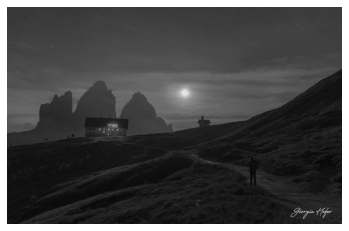

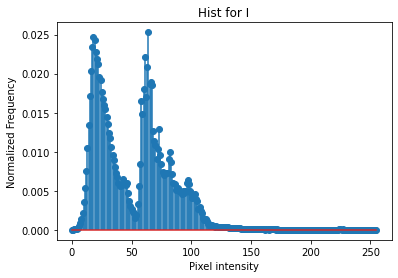

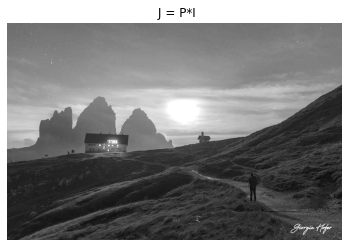

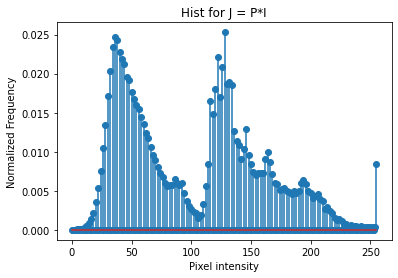

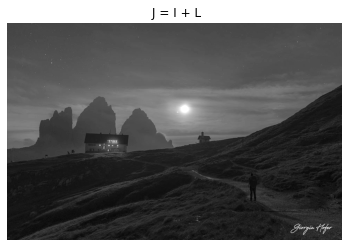

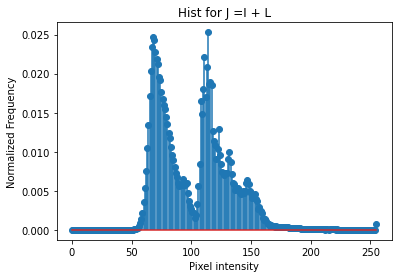

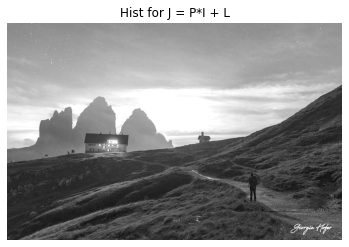

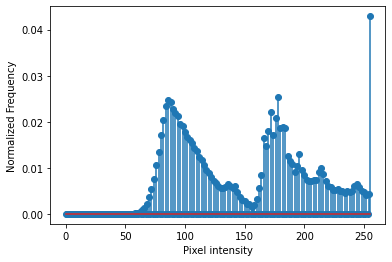

In [61]:
path2 = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/MoonJupiterPass_Hofer_960.jpg'
img2 = image2(path2,display = True)
img2.compute_hist( img2.I, plot_hist = True, title = "Hist for I")

### J = PI
img2.linear_transform(P = 2, L = 0, display = True, title = " J = P*I")
img2.compute_hist(img2.J, plot_hist = True, title = "Hist for J = P*I")


### J = I + L
img2.linear_transform(P = 1, L = 50, display = True, title = " J = I + L")
img2.compute_hist(img2.J, plot_hist = True, title = "Hist for J =I + L")

### J = PI + L
img2.linear_transform(P = 2, L = 50, display = True, title = "Hist for J = P*I + L")
img2.compute_hist(img2.J, plot_hist = True)

### Problem 2.2: FSCS


Comments :

We can see that prior the range of the image is b/w [0,189]. After FSCS it covers the whole pixel intensity range as displayed in the histogram i.e; [0,255]

It enhanced the contrast of the image by pushing the limits to span the entire pixel intensity range . 

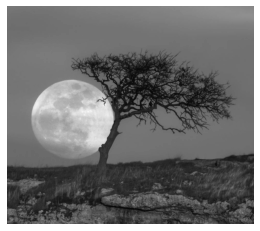

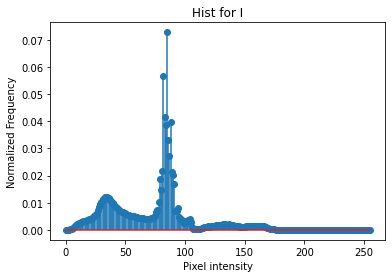

The pixel range of I is [0,189]


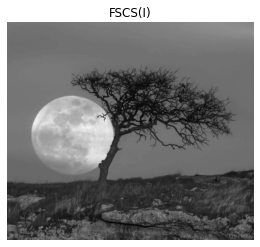

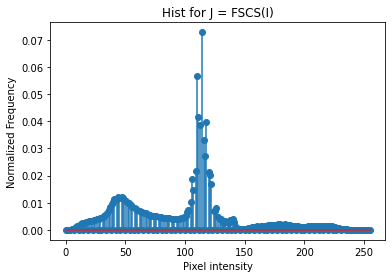

The pixel range of J = FSCS is [0,255]


In [62]:
path2 = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/MoonTree.jpg'
img2 = image2(path2,display = True)
img2.compute_hist( img2.I, plot_hist = True,title = "Hist for I")

print("The pixel range of I is [%d,%d]"%(np.amin(img2.I),np.amax(img2.I)))

img2.FSCS(display = True, title = "FSCS(I)")
img2.compute_hist( img2.J, plot_hist = True, title = "Hist for J = FSCS(I)")

print("The pixel range of J = FSCS is [%d,%d]"%(np.amin(img2.J),np.amax(img2.J)))

### Problem 2.3 : log compression

link for the image: https://apod.nasa.gov/apod/ap191015.html


Comments : The pixels whose intensity fall in the same logarithmic bin have a single intensity . Therefore we can see clusters in the sky.

I used log to the base 2 , which has almost 9 bins , thus 9 possible intensities in the output image. 

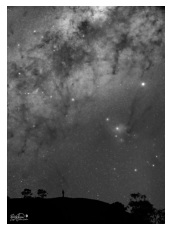

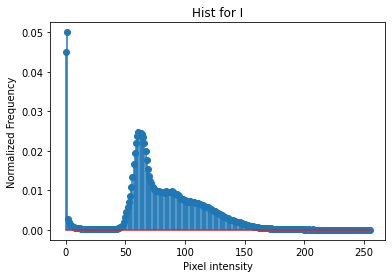

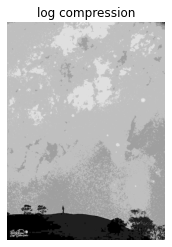

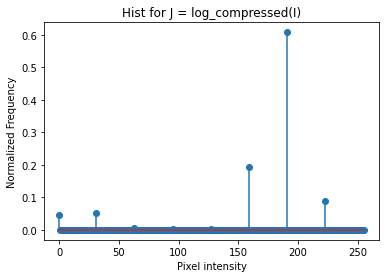

In [65]:
path2 = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/MilkyWayAbove_Guerra_960.jpg'
img2 = image2(path2,display = True)
img2.compute_hist( img2.I, plot_hist = True, title = "Hist for I")

img2.log_compression(display = True, title = "log compression")
img2.compute_hist( img2.J, plot_hist = True, title = "Hist for J = log_compressed(I)")

### Problem 2.4 : gamma correction

Comments : All the pixels greater that 52 are clipped to 255 after gamma correction .Since (i**1.4) >= 255 implies i>= 52.

Therefore majority of the pixels as we can see in the first histogram are >52 are all clipped to 255 . Thus most of the pixels in the corrected image has the value 255 and is completely white. 

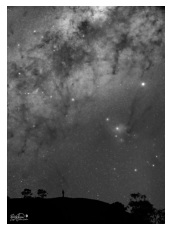

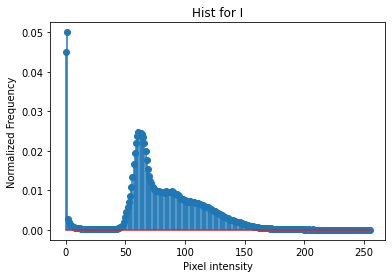

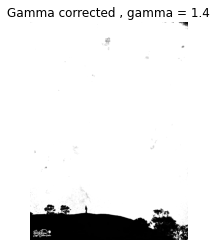

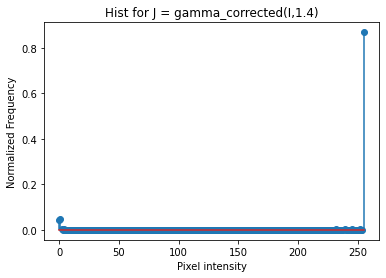

In [67]:
path2 = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/MilkyWayAbove_Guerra_960.jpg'
img2 = image2(path2,display = True)
img2.compute_hist( img2.I, plot_hist = True,title = "Hist for I")

img2.gamma_correction(gamma = 1.4, display = True, title = "Gamma corrected , gamma = 1.4")
img2.compute_hist(img2.J, plot_hist = True,title = "Hist for J = gamma_corrected(I,1.4)")

### Problem 2.5 : Histogram flattening 

image source  :  https://apod.nasa.gov/apod/ap191023.html

More like FSCS but is applied on the cumulative frequency unlike on the pixel intensity.

In addition to that , this also results in increasing the contrast of the image.

The actual image's histogram has fewer pixels of high intensity, but the transformed image's hist resembles a flattened hist. The intensity are occuring at almost same frequency, thus enhancing the contrast of the image . 

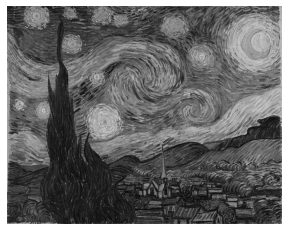

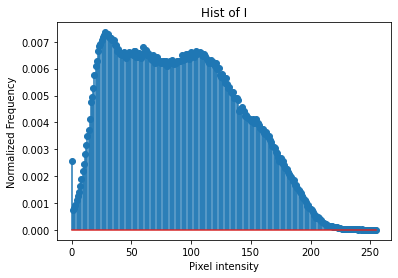

256
The pixel range of I is [0,255]


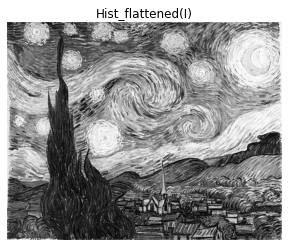

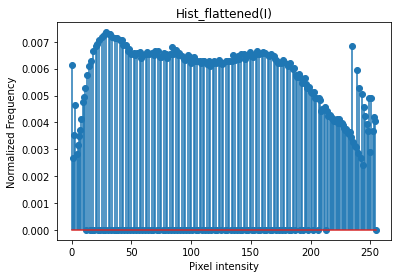

The pixel range of J = FSCS is [0,255]


In [68]:
path2 = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/StarryNight_VanGogh_970.jpg'
img2 = image2(path2,display = True)
img2.compute_hist( img2.I, plot_hist = True, title  = "Hist of I")

print(len(img2.hist))
print("The pixel range of I is [%d,%d]"%(np.amin(img2.I),np.amax(img2.I)))

img2.hist_flattening(display = True, title = "Hist_flattened(I)")
img2.compute_hist( img2.J, plot_hist = True, title = "Hist_flattened(I)")

print("The pixel range of J = FSCS is [%d,%d]"%(np.amin(img2.J),np.amax(img2.J)))

# Problem 3

In [70]:
class image3:
    ##############################  Utility functions  #################################### 
    def disp_img(self, I,factor, title = None): # A utility func for displaying images
        plt.rcParams['figure.dpi'] = 60
        
        h_by_w = I.shape[1]/I.shape[0]
        plt.figure(figsize=(5*factor,(5*(h_by_w)*factor) ))
        plt.imshow(I, cmap = 'gray')
        plt.title(title)
        plt.show()

    def __init__ (self, path, display = False):
        self.path = path
        self.I  = cv2.imread(self.path,cv2.IMREAD_GRAYSCALE) ## Reading the contents of the image I 
        if(display): ## Displaying I
            self.disp_img(self.I,factor = 1, title = "Original image")
    ##############################  Code 3.1 ####################################             
    def zoom_nearest_neighbour(self,factor,display = False, title = None):

        self.Z = np.zeros(( int(factor*self.I.shape[0]) ,int(factor*self.I.shape[1])  ))                
        self.Z = np.array([[ self.I[math.floor(i/factor) ][math.floor(j/factor) ]   for j in range(self.Z.shape[1])] for i in range(self.Z.shape[0])],dtype = np.uint8)
        if(display): ## Displaying Z
            self.disp_img(self.Z,factor,title = "Zoomed with nearest neighbour interpolation") 
            
    
    def valid(self,i,j):
        if(i>-1 and j > -1 and i < self.I.shape[0]and j < self.I.shape[1]):
            return True
        else:
            return False
        
    
    ##############################  Code 3.2 #################################### 
    def find_bin_interpolation(self,m,n,factor):
        i,j = int(m/factor),int(n/factor)
        A = []
        I_val = []
        
        if(self.valid(i-1,j)):
            A.append([1, (i-1)*factor , (j)*factor, (i-1)*factor*(j)*factor ])
            I_val.append([self.I[i-1][j]])
            
        if(self.valid(i+1,j)):
            A.append([1, (i+1)*factor , (j)*factor, (i+1)*factor*(j)*factor ])
            I_val.append([self.I[i+1][j]])
            
        if(self.valid(i,j-1)):
            A.append([1, (i)*factor , (j-1)*factor, (i)*factor*(j-1)*factor ])
            I_val.append([self.I[i][j-1]])
            
        if(self.valid(i,j+1)):
            A.append([1, (i)*factor , (j+1)*factor, (i)*factor*(j+1)*factor ])
            I_val.append([self.I[i][j+1]])
            
        A = np.array(A)
        I_val = np.array(I_val)
        
        C = np.linalg.pinv(A)@I_val 
        M = np.array([[1,m,n,m*n]])

        
        return (M@C)[0][0]
        
        
            
    def zoom_bin_interpolation(self,factor,display = False, title = None):
        
        
        
        self.Z = np.zeros(( int(factor*self.I.shape[0]) ,int(factor*self.I.shape[1])  ))                
        self.Z = np.array([[ self.find_bin_interpolation(m,n,factor)   for n in range(self.Z.shape[1])] for m in range(self.Z.shape[0])],dtype = np.uint8)
        if(display): ## Displaying Z
            self.disp_img(self.Z,factor,title = "Zoomed with binary interpolation") 
        



### Example 1 : StarryNight_VanGogh_970.jpg

image source  :  https://apod.nasa.gov/apod/ap191023.html

### Example2  : MilkyWayAbove_Guerra_960.jpg'

image source  :https://apod.nasa.gov/apod/ap191015.html

### Example 3 ;  MoonJupiterPass_Hofer_960.jpg

Link to the img: https://apod.nasa.gov/apod/image/1909/MoonJupiterPass_Hofer_960.jpg

### 3.1 Nearest neighbours interpolation




#### Quality of the image : 

Since we are assigning the same pixel intensity of the nearest neighbour , this can effect the smoothness of the zoomed image . We might find some box like structures due to sudden shift in intensity. The clarity is good but is not smooth enough.

#### Complexity of the algo : 
It is a naive algo , we are downsampling and picking the nearest neighbour. Thus the complexity is O(m*n), m : no. of rows and n: no. of cols .
 
 

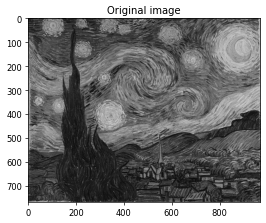

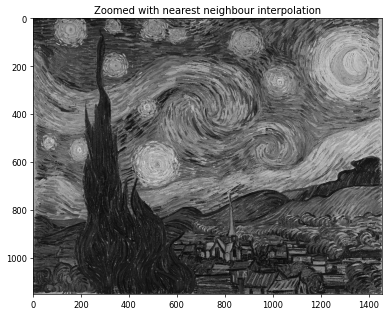

Shape of the original image is : (768,970)
Shape of the zoomed image is : (1152,1455)


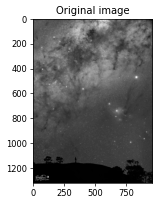

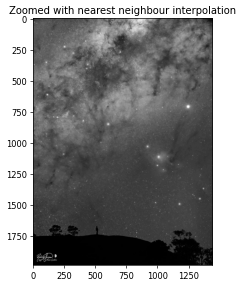

Shape of the original image is : (1322,960)
Shape of the zoomed image is : (1983,1440)


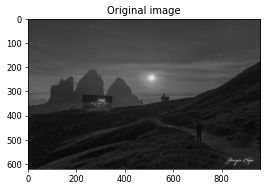

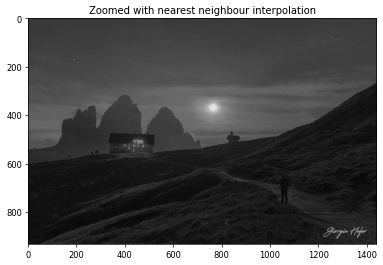

Shape of the original image is : (622,960)
Shape of the zoomed image is : (933,1440)


In [72]:
path3_a = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/StarryNight_VanGogh_970.jpg'
img3_a = image3(path3_a,display = True)
img3_a.zoom_nearest_neighbour(1.5,display = True)
print("Shape of the original image is : (%d,%d)"%(img3_a.I.shape))
print("Shape of the zoomed image is : (%d,%d)"%(img3_a.Z.shape))

path3_a = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/MilkyWayAbove_Guerra_960.jpg'
img3_a = image3(path3_a,display = True)
img3_a.zoom_nearest_neighbour(1.5,display = True)
print("Shape of the original image is : (%d,%d)"%(img3_a.I.shape))
print("Shape of the zoomed image is : (%d,%d)"%(img3_a.Z.shape))

path3_a = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/MoonJupiterPass_Hofer_960.jpg'
img3_a = image3(path3_a,display = True)
img3_a.zoom_nearest_neighbour(1.5,display = True)
print("Shape of the original image is : (%d,%d)"%(img3_a.I.shape))
print("Shape of the zoomed image is : (%d,%d)"%(img3_a.Z.shape))


### 3.2 Binary interpolation

Comments


#### Quality of the image : 
Since each pixel intensity in the zoomed image is bilinearly dependent upon its position and surrounding intensities , the results are smooth. Image seems to blurred till an extent but is far more smoother than the nearest neighbours algo. 

#### Complexity:
Finding intensity of each pixel in the zoomed image requires matrix inversion and matrix multiplication . Thus it takes a lot of time than the previous algo. 

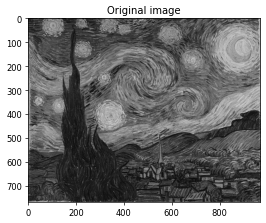

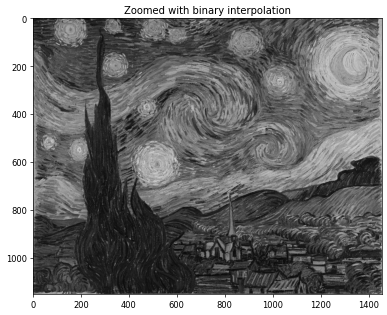

Shape of the original image is : (768,970)
Shape of the zoomed image is : (1152,1455)


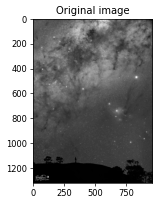

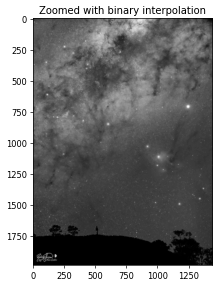

Shape of the original image is : (1322,960)
Shape of the zoomed image is : (1983,1440)


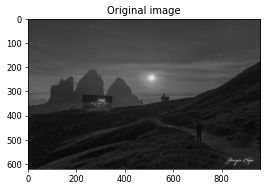

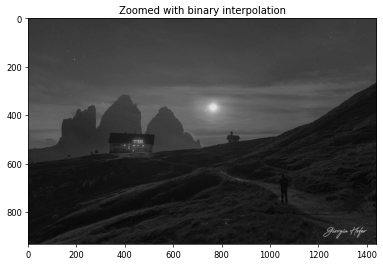

Shape of the original image is : (622,960)
Shape of the zoomed image is : (933,1440)


In [75]:
path3_b = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/StarryNight_VanGogh_970.jpg'
img3_b = image3(path3_b,display = True)
img3_b.zoom_bin_interpolation(1.5,display = True)
print("Shape of the original image is : (%d,%d)"%(img3_b.I.shape))
print("Shape of the zoomed image is : (%d,%d)"%(img3_b.Z.shape))

path3_b = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/MilkyWayAbove_Guerra_960.jpg'
img3_b = image3(path3_b,display = True)
img3_b.zoom_bin_interpolation(1.5,display = True)
print("Shape of the original image is : (%d,%d)"%(img3_b.I.shape))
print("Shape of the zoomed image is : (%d,%d)"%(img3_b.Z.shape))

path3_b = '/home/surya/Desktop/SEM_07/Image&Video_Proc/Assignments/HW#2/MoonJupiterPass_Hofer_960.jpg'
img3_b = image3(path3_b,display = True)
img3_b.zoom_bin_interpolation(1.5,display = True)
print("Shape of the original image is : (%d,%d)"%(img3_b.I.shape))
print("Shape of the zoomed image is : (%d,%d)"%(img3_b.Z.shape))

# THE END  